# Data Science Problem

**BRIEF INTRODUCTION**<br>From the fivethirtyeight.com git repository, I downloaded the Star Wars dataset, which contains survey data about the first six Star Wars movies, and includes rankings of the films, favorability ratings of characters, fan types, and demographics.

**DATA SCIENCE PROBLEM**<br>How accurately can I predict whether Darth Vader is rated "very favorably"?<br>Secondarily, which predictors are more or less associated with Darth Vader very favorableness?

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

# Import scalers and classifiers
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, \
                             GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve, precision_score, \
                            roc_auc_score, f1_score

# Get Data

In [2]:
df = pd.read_csv("../data/StarWars_renamed.csv")

In [3]:
df.head()

,RespondentID,seen_any_sw_films,star_wars_fan,saw_ep1_phantom,saw_ep2_attack,saw_ep3_revenge,saw_ep4_newhope,saw_ep5_empire,saw_ep6_return,ep_1_rank,...,yoda_fav,who_shot_first,familiar_expanded,fan_expanded,startrek_fan,gender,age,income,education,region
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
df.tail()

,RespondentID,seen_any_sw_films,star_wars_fan,saw_ep1_phantom,saw_ep2_attack,saw_ep3_revenge,saw_ep4_newhope,saw_ep5_empire,saw_ep6_return,ep_1_rank,...,yoda_fav,who_shot_first,familiar_expanded,fan_expanded,startrek_fan,gender,age,income,education,region
1181,3288388730,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1182,3288378779,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1183,3288375286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1184,3288373068,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central
1185,3288372923,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,NaN,NaN,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very unfavorably,I don't understand this question,No,NaN,No,Female,> 60,"$50,000 - $99,999",Graduate degree,Pacific


In [5]:
df.columns

Index(['RespondentID', 'seen_any_sw_films', 'star_wars_fan', 'saw_ep1_phantom',
       'saw_ep2_attack', 'saw_ep3_revenge', 'saw_ep4_newhope',
       'saw_ep5_empire', 'saw_ep6_return', 'ep_1_rank', 'ep_2_rank',
       'ep_3_rank', 'ep_4_rank', 'ep_5_rank', 'ep_6_rank', 'han_fav',
       'luke_fav', 'leia_fav', 'anakin_fav', 'obiwan_fav', 'palpatine_fav',
       'darth_fav', 'lando_fav', 'boba_fav', 'c3po_fav', 'r2d2_fav',
       'jarjar_fav', 'padme_fav', 'yoda_fav', 'who_shot_first',
       'familiar_expanded', 'fan_expanded', 'startrek_fan', 'gender', 'age',
       'income', 'education', 'region'],
      dtype='object')

In [6]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 50)

# Data Cleaning

In [7]:
df.shape

(1186, 38)

In [8]:
df["seen_any_sw_films"].value_counts()

Yes    936
No     250
Name: seen_any_sw_films, dtype: int64

In [9]:
# Drop non-film viewers
df = df[df["seen_any_sw_films"] != "No"]

In [10]:
df["seen_any_sw_films"].value_counts()

Yes    936
Name: seen_any_sw_films, dtype: int64

In [11]:
# Drop variable since it's now all yes
df.drop(columns="seen_any_sw_films", inplace=True)

In [12]:
df.head()

,RespondentID,star_wars_fan,saw_ep1_phantom,saw_ep2_attack,saw_ep3_revenge,saw_ep4_newhope,saw_ep5_empire,saw_ep6_return,ep_1_rank,ep_2_rank,ep_3_rank,ep_4_rank,ep_5_rank,ep_6_rank,han_fav,luke_fav,leia_fav,anakin_fav,obiwan_fav,palpatine_fav,darth_fav,lando_fav,boba_fav,c3po_fav,r2d2_fav,jarjar_fav,padme_fav,yoda_fav,who_shot_first,familiar_expanded,fan_expanded,startrek_fan,gender,age,income,education,region
0,3292879998,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292765271,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,4.0,3.0,6.0,5.0,2.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic


In [13]:
df.isnull().sum()

RespondentID           0
star_wars_fan        100
saw_ep1_phantom      263
saw_ep2_attack       365
saw_ep3_revenge      386
saw_ep4_newhope      329
saw_ep5_empire       178
saw_ep6_return       198
ep_1_rank            101
ep_2_rank            100
ep_3_rank            101
ep_4_rank            100
ep_5_rank            100
ep_6_rank            100
han_fav              107
luke_fav             105
leia_fav             105
anakin_fav           113
obiwan_fav           111
palpatine_fav        122
darth_fav            110
lando_fav            116
boba_fav             124
c3po_fav             109
r2d2_fav             106
jarjar_fav           115
padme_fav            122
yoda_fav             110
who_shot_first       108
familiar_expanded    108
fan_expanded         723
startrek_fan         108
gender               116
age                  116
income               261
education            120
region               118
dtype: int64

In [14]:
df["star_wars_fan"].value_counts()

Yes    552
No     284
Name: star_wars_fan, dtype: int64

In [15]:
# Recode star_wars_fan as binary
df["star_wars_fan"] = (df["star_wars_fan"] == 'Yes').astype(int)
df["star_wars_fan"].value_counts()

1    552
0    384
Name: star_wars_fan, dtype: int64

In [16]:
df["saw_ep1_phantom"] = (df["saw_ep1_phantom"].notnull()).astype(int)
df["saw_ep1_phantom"].value_counts()

1    673
0    263
Name: saw_ep1_phantom, dtype: int64

In [17]:
df["saw_ep2_attack"] = (df["saw_ep2_attack"].notnull()).astype(int)
df["saw_ep3_revenge"] = (df["saw_ep3_revenge"].notnull()).astype(int)
df["saw_ep4_newhope"] = (df["saw_ep4_newhope"].notnull()).astype(int)
df["saw_ep5_empire"] = (df["saw_ep5_empire"].notnull()).astype(int)
df["saw_ep6_return"] = (df["saw_ep6_return"].notnull()).astype(int)

In [18]:
df["saw_ep2_attack"].value_counts()

1    571
0    365
Name: saw_ep2_attack, dtype: int64

In [19]:
df["saw_ep3_revenge"].value_counts()

1    550
0    386
Name: saw_ep3_revenge, dtype: int64

In [20]:
df["saw_ep4_newhope"].value_counts()

1    607
0    329
Name: saw_ep4_newhope, dtype: int64

In [21]:
df["saw_ep5_empire"].value_counts()

1    758
0    178
Name: saw_ep5_empire, dtype: int64

In [22]:
df["saw_ep6_return"].value_counts()

1    738
0    198
Name: saw_ep6_return, dtype: int64

In [23]:
df.isnull().sum()

RespondentID           0
star_wars_fan          0
saw_ep1_phantom        0
saw_ep2_attack         0
saw_ep3_revenge        0
saw_ep4_newhope        0
saw_ep5_empire         0
saw_ep6_return         0
ep_1_rank            101
ep_2_rank            100
ep_3_rank            101
ep_4_rank            100
ep_5_rank            100
ep_6_rank            100
han_fav              107
luke_fav             105
leia_fav             105
anakin_fav           113
obiwan_fav           111
palpatine_fav        122
darth_fav            110
lando_fav            116
boba_fav             124
c3po_fav             109
r2d2_fav             106
jarjar_fav           115
padme_fav            122
yoda_fav             110
who_shot_first       108
familiar_expanded    108
fan_expanded         723
startrek_fan         108
gender               116
age                  116
income               261
education            120
region               118
dtype: int64

In [24]:
df[df["ep_1_rank"].isnull()]

,RespondentID,star_wars_fan,saw_ep1_phantom,saw_ep2_attack,saw_ep3_revenge,saw_ep4_newhope,saw_ep5_empire,saw_ep6_return,ep_1_rank,ep_2_rank,ep_3_rank,ep_4_rank,ep_5_rank,ep_6_rank,han_fav,luke_fav,leia_fav,anakin_fav,obiwan_fav,palpatine_fav,darth_fav,lando_fav,boba_fav,c3po_fav,r2d2_fav,jarjar_fav,padme_fav,yoda_fav,who_shot_first,familiar_expanded,fan_expanded,startrek_fan,gender,age,income,education,region
10,3292637870,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,3291669388,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,3291570206,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,3291469991,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,3291420030,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,3291405943,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,3291341186,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,3291037640,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,3291022013,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,3291006540,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
index_no_rank = df[df["ep_1_rank"].isnull()].index
# Delete these row indexes
df.drop(index_no_rank , inplace=True)
df.reset_index(drop=True, inplace=True)
df["ep_1_rank"].value_counts()

4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: ep_1_rank, dtype: int64

In [26]:
df.isnull().sum()

RespondentID           0
star_wars_fan          0
saw_ep1_phantom        0
saw_ep2_attack         0
saw_ep3_revenge        0
saw_ep4_newhope        0
saw_ep5_empire         0
saw_ep6_return         0
ep_1_rank              0
ep_2_rank              0
ep_3_rank              1
ep_4_rank              0
ep_5_rank              0
ep_6_rank              0
han_fav                7
luke_fav               5
leia_fav               5
anakin_fav            13
obiwan_fav            11
palpatine_fav         22
darth_fav             10
lando_fav             16
boba_fav              23
c3po_fav               9
r2d2_fav               6
jarjar_fav            14
padme_fav             21
yoda_fav              10
who_shot_first         8
familiar_expanded      8
fan_expanded         622
startrek_fan           8
gender                16
age                   16
income               161
education             20
region                18
dtype: int64

In [27]:
df["ep_3_rank"].replace(np.nan, 6, inplace=True)

In [28]:
df.isnull().sum()

RespondentID           0
star_wars_fan          0
saw_ep1_phantom        0
saw_ep2_attack         0
saw_ep3_revenge        0
saw_ep4_newhope        0
saw_ep5_empire         0
saw_ep6_return         0
ep_1_rank              0
ep_2_rank              0
ep_3_rank              0
ep_4_rank              0
ep_5_rank              0
ep_6_rank              0
han_fav                7
luke_fav               5
leia_fav               5
anakin_fav            13
obiwan_fav            11
palpatine_fav         22
darth_fav             10
lando_fav             16
boba_fav              23
c3po_fav               9
r2d2_fav               6
jarjar_fav            14
padme_fav             21
yoda_fav              10
who_shot_first         8
familiar_expanded      8
fan_expanded         622
startrek_fan           8
gender                16
age                   16
income               161
education             20
region                18
dtype: int64

In [29]:
df["han_fav"].value_counts()

Very favorably                                 609
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: han_fav, dtype: int64

In [30]:
df[df["han_fav"].isnull()]

,RespondentID,star_wars_fan,saw_ep1_phantom,saw_ep2_attack,saw_ep3_revenge,saw_ep4_newhope,saw_ep5_empire,saw_ep6_return,ep_1_rank,ep_2_rank,ep_3_rank,ep_4_rank,ep_5_rank,ep_6_rank,han_fav,luke_fav,leia_fav,anakin_fav,obiwan_fav,palpatine_fav,darth_fav,lando_fav,boba_fav,c3po_fav,r2d2_fav,jarjar_fav,padme_fav,yoda_fav,who_shot_first,familiar_expanded,fan_expanded,startrek_fan,gender,age,income,education,region
29,3292318652,0,0,1,1,0,0,0,6.0,1.0,2.0,3.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Han,No,NaN,No,Male,18-29,"$50,000 - $99,999",High school degree,Mountain
53,3292125068,1,0,0,0,1,0,0,1.0,2.0,3.0,4.0,5.0,6.0,NaN,Somewhat unfavorably,Somewhat favorably,NaN,Somewhat unfavorably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greedo,No,NaN,Yes,Male,30-44,"$100,000 - $149,999",Graduate degree,Pacific
90,3291455642,0,0,0,0,0,1,0,2.0,3.0,4.0,5.0,1.0,6.0,NaN,Very favorably,Very favorably,NaN,Very favorably,NaN,Very unfavorably,NaN,NaN,Very favorably,Very favorably,Very favorably,NaN,NaN,I don't understand this question,No,NaN,No,Male,> 60,"$25,000 - $49,999",Some college or Associate degree,South Atlantic
303,3290631608,0,0,1,0,0,1,1,6.0,1.0,5.0,3.0,4.0,2.0,NaN,Very favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Somewhat unfavorably,Very unfavorably,Very unfavorably,Somewhat unfavorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Very favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Somewhat unfavorably,Greedo,Yes,No,No,Female,45-60,NaN,NaN,West South Central
391,3290318577,0,1,1,1,0,0,0,1.0,2.0,3.0,4.0,5.0,6.0,NaN,Very favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Neither favorably nor unfavorably (neutral),Neither favorably nor unfavorably (neutral),Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Neither favorably nor unfavorably (neutral),Somewhat favorably,I don't understand this question,No,NaN,No,Female,30-44,"$25,000 - $49,999",Some college or Associate degree,Pacific
720,3288653548,1,0,1,0,0,1,1,1.0,2.0,3.0,5.0,6.0,4.0,NaN,Somewhat favorably,Somewhat favorably,NaN,Somewhat favorably,NaN,Somewhat favorably,NaN,NaN,Somewhat favorably,Somewhat favorably,NaN,NaN,Somewhat favorably,I don't understand this question,No,NaN,Yes,Male,> 60,"$50,000 - $99,999",High school degree,West South Central
750,3288578983,0,0,0,0,0,1,1,5.0,4.0,3.0,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I don't understand this question,No,NaN,No,Female,45-60,NaN,Graduate degree,New England


In [31]:
df["darth_fav"].value_counts()

Very favorably                                 309
Somewhat favorably                             171
Very unfavorably                               149
Somewhat unfavorably                           102
Neither favorably nor unfavorably (neutral)     84
Unfamiliar (N/A)                                10
Name: darth_fav, dtype: int64

In [32]:
df["darth_very_fav"] = (df["darth_fav"] == "Very favorably").astype(int)
df["darth_very_fav"].value_counts(normalize=True)

0    0.62994
1    0.37006
Name: darth_very_fav, dtype: float64

In [33]:
df["darth_some_very_fav"] = ((df["darth_fav"] == "Very favorably") | 
                             (df["darth_fav"] == "Somewhat favorably")).astype(int)
df["darth_some_very_fav"].value_counts(normalize=True)

1    0.57485
0    0.42515
Name: darth_some_very_fav, dtype: float64

In [34]:
df.isnull().sum()

RespondentID             0
star_wars_fan            0
saw_ep1_phantom          0
saw_ep2_attack           0
saw_ep3_revenge          0
saw_ep4_newhope          0
saw_ep5_empire           0
saw_ep6_return           0
ep_1_rank                0
ep_2_rank                0
ep_3_rank                0
ep_4_rank                0
ep_5_rank                0
ep_6_rank                0
han_fav                  7
luke_fav                 5
leia_fav                 5
anakin_fav              13
obiwan_fav              11
palpatine_fav           22
darth_fav               10
lando_fav               16
boba_fav                23
c3po_fav                 9
r2d2_fav                 6
jarjar_fav              14
padme_fav               21
yoda_fav                10
who_shot_first           8
familiar_expanded        8
fan_expanded           622
startrek_fan             8
gender                  16
age                     16
income                 161
education               20
region                  18
d

In [35]:
df["who_shot_first"].value_counts()

Han                                 325
I don't understand this question    305
Greedo                              197
Name: who_shot_first, dtype: int64

In [36]:
df["han_shot_first"] = (df["who_shot_first"] == "Han").astype(int)
df["han_shot_first"].value_counts(normalize=True)

0    0.610778
1    0.389222
Name: han_shot_first, dtype: float64

In [37]:
df["familiar_expanded"].value_counts()

No     614
Yes    213
Name: familiar_expanded, dtype: int64

In [38]:
df["fan_expanded"].value_counts()

No     114
Yes     99
Name: fan_expanded, dtype: int64

In [39]:
df["familiar_expanded"] = (df["familiar_expanded"] == "Yes").astype(int)
df["fan_expanded"] = (df["fan_expanded"] == "Yes").astype(int)
df["expanded"] = df["familiar_expanded"] + df["fan_expanded"]
df["expanded"].value_counts()

0    622
1    114
2     99
Name: expanded, dtype: int64

In [40]:
df["expanded"].dtype

dtype('int64')

In [41]:
df["expanded"] = df["expanded"].astype(str)

In [42]:
df["expanded"].value_counts()

0    622
1    114
2     99
Name: expanded, dtype: int64

In [43]:
df["expanded"] = df["expanded"].map({'0': 'not familiar',
                                     '1': 'familiar not fan',
                                     '2': 'familiar and fan'})

In [44]:
df["expanded"].value_counts()

not familiar        622
familiar not fan    114
familiar and fan     99
Name: expanded, dtype: int64

In [45]:
df.isnull().sum()

RespondentID             0
star_wars_fan            0
saw_ep1_phantom          0
saw_ep2_attack           0
saw_ep3_revenge          0
saw_ep4_newhope          0
saw_ep5_empire           0
saw_ep6_return           0
ep_1_rank                0
ep_2_rank                0
ep_3_rank                0
ep_4_rank                0
ep_5_rank                0
ep_6_rank                0
han_fav                  7
luke_fav                 5
leia_fav                 5
anakin_fav              13
obiwan_fav              11
palpatine_fav           22
darth_fav               10
lando_fav               16
boba_fav                23
c3po_fav                 9
r2d2_fav                 6
jarjar_fav              14
padme_fav               21
yoda_fav                10
who_shot_first           8
familiar_expanded        0
fan_expanded             0
startrek_fan             8
gender                  16
age                     16
income                 161
education               20
region                  18
d

In [46]:
df["startrek_fan"].value_counts()

Yes    415
No     412
Name: startrek_fan, dtype: int64

In [47]:
df["startrek_fan"] = (df["startrek_fan"] == "Yes").astype(int)
df["startrek_fan"].value_counts()

0    420
1    415
Name: startrek_fan, dtype: int64

In [48]:
df["gender"].value_counts()

Male      423
Female    396
Name: gender, dtype: int64

In [49]:
df["age"].value_counts()

45-60    240
30-44    207
> 60     192
18-29    180
Name: age, dtype: int64

In [50]:
df["income"].value_counts()

$50,000 - $99,999      237
$25,000 - $49,999      147
$100,000 - $149,999    115
$0 - $24,999            98
$150,000.00             77
Name: income, dtype: int64

In [51]:
df["education"].value_counts()

Bachelor degree                     262
Some college or Associate degree    254
Graduate degree                     225
High school degree                   71
Less than high school degree          3
Name: education, dtype: int64

In [52]:
df["education"].replace("Less than high school degree", "High school degree", inplace=True)
df["education"].value_counts()

Bachelor degree                     262
Some college or Associate degree    254
Graduate degree                     225
High school degree                   74
Name: education, dtype: int64

In [53]:
df["education"] = df["education"].map({"Bachelor degree": "Bachelor degree",
                                       "Some college or Associate degree": "Some college or Associate degree",
                                       "Graduate degree": "Graduate degree",
                                       "High school degree": "HS degree or less"
                                     })
df["education"].value_counts()

Bachelor degree                     262
Some college or Associate degree    254
Graduate degree                     225
HS degree or less                    74
Name: education, dtype: int64

In [54]:
df["region"].value_counts()

Pacific               146
East North Central    134
South Atlantic        133
Middle Atlantic        93
West South Central     76
West North Central     76
Mountain               68
New England            59
East South Central     32
Name: region, dtype: int64

In [55]:
df["region"] = df["region"].map({
    "Pacific": "Pacific",
    "East North Central": "North Central",
    "South Atlantic": "South Atlantic",
    "Middle Atlantic": "Middle Atlantic",
    "West South Central": "South Central",
    "West North Central": "North Central",
    "Mountain": "Mountain",
    "New England": "New England",
    "East South Central": "South Central"
})
df["region"].value_counts()

North Central      210
Pacific            146
South Atlantic     133
South Central      108
Middle Atlantic     93
Mountain            68
New England         59
Name: region, dtype: int64

In [56]:
df.columns

Index(['RespondentID', 'star_wars_fan', 'saw_ep1_phantom', 'saw_ep2_attack',
       'saw_ep3_revenge', 'saw_ep4_newhope', 'saw_ep5_empire',
       'saw_ep6_return', 'ep_1_rank', 'ep_2_rank', 'ep_3_rank', 'ep_4_rank',
       'ep_5_rank', 'ep_6_rank', 'han_fav', 'luke_fav', 'leia_fav',
       'anakin_fav', 'obiwan_fav', 'palpatine_fav', 'darth_fav', 'lando_fav',
       'boba_fav', 'c3po_fav', 'r2d2_fav', 'jarjar_fav', 'padme_fav',
       'yoda_fav', 'who_shot_first', 'familiar_expanded', 'fan_expanded',
       'startrek_fan', 'gender', 'age', 'income', 'education', 'region',
       'darth_very_fav', 'darth_some_very_fav', 'han_shot_first', 'expanded'],
      dtype='object')

In [57]:
df = pd.get_dummies(df, columns=["han_fav",
                                 "luke_fav",
                                 "leia_fav",
                                 "anakin_fav",
                                 "obiwan_fav",
                                 "palpatine_fav",
                                 "lando_fav",
                                 "boba_fav",
                                 "c3po_fav", 
                                 "r2d2_fav", 
                                 "jarjar_fav",
                                 "padme_fav", 
                                 "yoda_fav", 
                                 "expanded", 
                                 "gender", 
                                 "age",
                                 "income", 
                                 "education",
                                 "region"], 
                    dummy_na=True, 
                    drop_first=True)
df.head()

,RespondentID,star_wars_fan,saw_ep1_phantom,saw_ep2_attack,saw_ep3_revenge,saw_ep4_newhope,saw_ep5_empire,saw_ep6_return,ep_1_rank,ep_2_rank,ep_3_rank,ep_4_rank,ep_5_rank,ep_6_rank,darth_fav,who_shot_first,familiar_expanded,fan_expanded,startrek_fan,darth_very_fav,darth_some_very_fav,han_shot_first,han_fav_Somewhat favorably,han_fav_Somewhat unfavorably,han_fav_Unfamiliar (N/A),...,expanded_familiar not fan,expanded_not familiar,expanded_nan,gender_Male,gender_nan,age_30-44,age_45-60,age_> 60,age_nan,"income_$100,000 - $149,999","income_$150,000.00","income_$25,000 - $49,999","income_$50,000 - $99,999",income_nan,education_Graduate degree,education_HS degree or less,education_Some college or Associate degree,education_nan,region_Mountain,region_New England,region_North Central,region_Pacific,region_South Atlantic,region_South Central,region_nan
0,3292879998,1,1,1,1,1,1,1,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,I don't understand this question,1,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,3292765271,0,1,1,1,0,0,0,1.0,2.0,3.0,4.0,5.0,6.0,Unfamiliar (N/A),I don't understand this question,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,3292763116,1,1,1,1,1,1,1,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,I don't understand this question,0,0,1,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,3292731220,1,1,1,1,1,1,1,5.0,4.0,6.0,2.0,1.0,3.0,Somewhat favorably,Greedo,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,3292719380,1,1,1,1,1,1,1,1.0,4.0,3.0,6.0,5.0,2.0,Very favorably,Han,1,0,1,1,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
df.columns

Index(['RespondentID', 'star_wars_fan', 'saw_ep1_phantom', 'saw_ep2_attack',
       'saw_ep3_revenge', 'saw_ep4_newhope', 'saw_ep5_empire',
       'saw_ep6_return', 'ep_1_rank', 'ep_2_rank',
       ...
       'education_HS degree or less',
       'education_Some college or Associate degree', 'education_nan',
       'region_Mountain', 'region_New England', 'region_North Central',
       'region_Pacific', 'region_South Atlantic', 'region_South Central',
       'region_nan'],
      dtype='object', length=125)

In [59]:
df_cl = df.drop(columns=["darth_fav", "who_shot_first", "familiar_expanded", "fan_expanded"])
df_cl.head()

,RespondentID,star_wars_fan,saw_ep1_phantom,saw_ep2_attack,saw_ep3_revenge,saw_ep4_newhope,saw_ep5_empire,saw_ep6_return,ep_1_rank,ep_2_rank,ep_3_rank,ep_4_rank,ep_5_rank,ep_6_rank,startrek_fan,darth_very_fav,darth_some_very_fav,han_shot_first,han_fav_Somewhat favorably,han_fav_Somewhat unfavorably,han_fav_Unfamiliar (N/A),han_fav_Very favorably,han_fav_Very unfavorably,han_fav_nan,luke_fav_Somewhat favorably,...,expanded_familiar not fan,expanded_not familiar,expanded_nan,gender_Male,gender_nan,age_30-44,age_45-60,age_> 60,age_nan,"income_$100,000 - $149,999","income_$150,000.00","income_$25,000 - $49,999","income_$50,000 - $99,999",income_nan,education_Graduate degree,education_HS degree or less,education_Some college or Associate degree,education_nan,region_Mountain,region_New England,region_North Central,region_Pacific,region_South Atlantic,region_South Central,region_nan
0,3292879998,1,1,1,1,1,1,1,3.0,2.0,1.0,4.0,5.0,6.0,0,1,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,3292765271,0,1,1,1,0,0,0,1.0,2.0,3.0,4.0,5.0,6.0,0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,3292763116,1,1,1,1,1,1,1,5.0,6.0,1.0,2.0,4.0,3.0,1,1,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,3292731220,1,1,1,1,1,1,1,5.0,4.0,6.0,2.0,1.0,3.0,0,0,1,0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,3292719380,1,1,1,1,1,1,1,1.0,4.0,3.0,6.0,5.0,2.0,1,1,1,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
df_cl.isnull().sum()

RespondentID                                  0
star_wars_fan                                 0
saw_ep1_phantom                               0
saw_ep2_attack                                0
saw_ep3_revenge                               0
saw_ep4_newhope                               0
saw_ep5_empire                                0
saw_ep6_return                                0
ep_1_rank                                     0
ep_2_rank                                     0
ep_3_rank                                     0
ep_4_rank                                     0
ep_5_rank                                     0
ep_6_rank                                     0
startrek_fan                                  0
darth_very_fav                                0
darth_some_very_fav                           0
han_shot_first                                0
han_fav_Somewhat favorably                    0
han_fav_Somewhat unfavorably                  0
han_fav_Unfamiliar (N/A)                

In [61]:
df_cl.shape

(835, 121)

In [62]:
df_cl.rename(columns = {
    "age_30-44": "age_30_44",
    "age_45-60": "age_45_60",
    "age_> 60": "age_over_60",
    "income_$100,000 - $149,999": "income_100_149",
    "income_$150,000.00": "income_150_plus",
    "income_$25,000 - $49,999": "income_25_49",
    "income_$50,000 - $99,999": "income_50_99",
    "education_Graduate degree": "educ_grad",
    "education_HS degree or less": "educ_HS_less",
    "education_Some college or Associate degree": "educ_somecoll_assoc",

}, inplace=True)

df_cl.head()

,RespondentID,star_wars_fan,saw_ep1_phantom,saw_ep2_attack,saw_ep3_revenge,saw_ep4_newhope,saw_ep5_empire,saw_ep6_return,ep_1_rank,ep_2_rank,ep_3_rank,ep_4_rank,ep_5_rank,ep_6_rank,startrek_fan,darth_very_fav,darth_some_very_fav,han_shot_first,han_fav_Somewhat favorably,han_fav_Somewhat unfavorably,han_fav_Unfamiliar (N/A),han_fav_Very favorably,han_fav_Very unfavorably,han_fav_nan,luke_fav_Somewhat favorably,...,expanded_familiar not fan,expanded_not familiar,expanded_nan,gender_Male,gender_nan,age_30_44,age_45_60,age_over_60,age_nan,income_100_149,"income_$150,000.00",income_25_49,income_50_99,income_nan,educ_grad,educ_HS_less,educ_somecoll_assoc,education_nan,region_Mountain,region_New England,region_North Central,region_Pacific,region_South Atlantic,region_South Central,region_nan
0,3292879998,1,1,1,1,1,1,1,3.0,2.0,1.0,4.0,5.0,6.0,0,1,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1,3292765271,0,1,1,1,0,0,0,1.0,2.0,3.0,4.0,5.0,6.0,0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,3292763116,1,1,1,1,1,1,1,5.0,6.0,1.0,2.0,4.0,3.0,1,1,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,3292731220,1,1,1,1,1,1,1,5.0,4.0,6.0,2.0,1.0,3.0,0,0,1,0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,3292719380,1,1,1,1,1,1,1,1.0,4.0,3.0,6.0,5.0,2.0,1,1,1,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
df_cl.to_csv("../data/StarWars_cleaned.csv")

# EDA

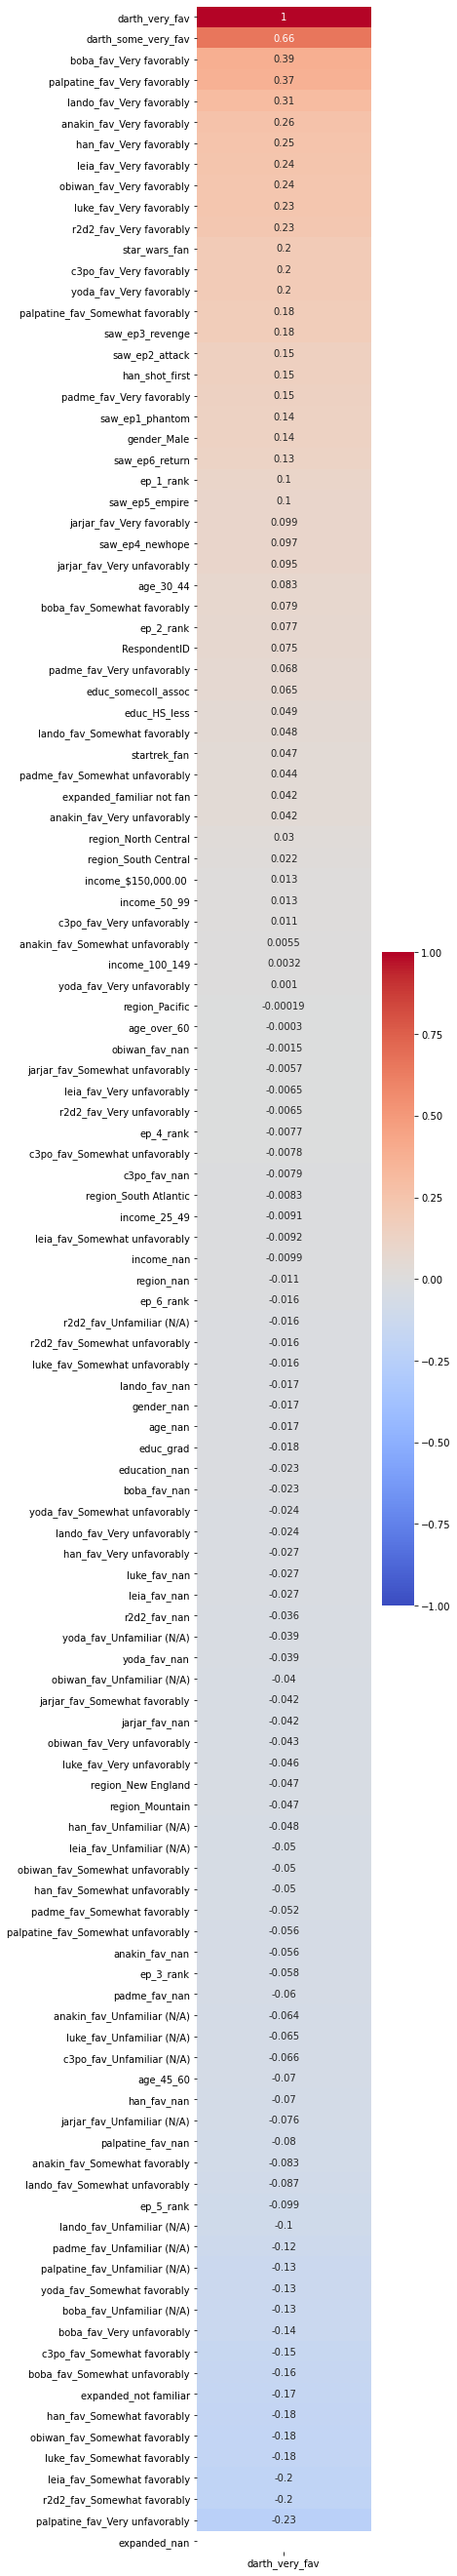

In [64]:
plt.figure(figsize=(4, 48))
sns.heatmap(df_cl.corr()[["darth_very_fav"]].sort_values("darth_very_fav", ascending=False),
            cmap = "coolwarm",
            vmin=-1,
            vmax=1,
            annot = True);

In [65]:
df_cl["expanded_nan"].value_counts()

0    835
Name: expanded_nan, dtype: int64

# Analysis

## Define X and Y vars, Create test train split

In [66]:
X = df_cl.drop(columns=["darth_very_fav", "darth_some_very_fav", "RespondentID", "expanded_nan"])
y = df_cl["darth_very_fav"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

In [68]:
X_train.shape

(584, 117)

In [69]:
X_test.shape

(251, 117)

## Set baseline

In [70]:
y_train.value_counts(normalize=True)

0    0.630137
1    0.369863
Name: darth_very_fav, dtype: float64

## Try logistic regression first (no regularization)

In [71]:
# Instantiate Logistic Regression
lr1 = LogisticRegression(penalty='none', solver='saga', random_state=42, max_iter=5000)

In [72]:
lr1_cv = cross_val_score(lr1, X_train, y_train, cv=5).mean()

In [73]:
lr1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
lr1_train_acc = lr1.score(X_train, y_train)

In [75]:
lr1_test_acc = lr1.score(X_test, y_test)

In [76]:
# Predict test data
y_pred_lr1 = lr1.predict(X_test)

# Predict test data probabilities
y_probs_lr1 = lr1.predict_proba(X_test)

# Create confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr1).ravel()
print(confusion_matrix(y_test, y_pred_lr1))

# Compute sensitivity & specificity
sensitivity_lr1 = tp / (tp + fn)
specificity_lr1 = tn / (tn + fp)

# Compute precision
precision_lr1 = precision_score(y_test, y_pred_lr1)

# Compute roc_auc score
roc_auc_lr1 = roc_auc_score(y_test, y_probs_lr1[:, 1])

# Compute f1-score
lr1_f1_test = f1_score(y_test, y_pred_lr1)

# Model score summary
print(f'Cross-Val Accuracy:', round(lr1_cv, 4))
print(f'Train Accuracy:', round(lr1_train_acc, 4))
print(f'Test Accuracy:', round(lr1_test_acc, 4))
print(f'Test Sensitivity:', round(sensitivity_lr1, 4))
print(f'Test Specificity:', round(specificity_lr1, 4))
print(f'Test Precision:', round(precision_lr1, 4))
print(f'Test F1 Score:', round(lr1_f1_test, 4))
print(f'ROC AUC:', round(roc_auc_lr1, 4))

[[126  32]
 [ 41  52]]
Cross-Val Accuracy: 0.7346
Train Accuracy: 0.8527
Test Accuracy: 0.7092
Test Sensitivity: 0.5591
Test Specificity: 0.7975
Test Precision: 0.619
Test F1 Score: 0.5876
ROC AUC: 0.7334


## Now try regularized logistic regression

In [77]:
lr2_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(penalty='l1', 
                              solver='saga', 
                              random_state=42, 
                              max_iter=5000))
])

In [78]:
lr2_pipe_params = {
    'lr__C': [.001, .01, .1, .5, .75, .9, 1, 10]
}

In [79]:
# Instantiate grid search
gs_lr2 = GridSearchCV(lr2_pipe, 
                  param_grid=lr2_pipe_params, 
                  cv=5, 
                  n_jobs=-1,
                  verbose=1)

# Fit grid search to training data
gs_lr2.fit(X_train, y_train)

# Get best params
gs_lr2.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.0s finished


{'lr__C': 0.1}

In [80]:
gs_lr2.best_score_

0.7687739463601533

In [81]:
# Scale data for use in regularized logistic regression model
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [82]:
# Instantiate logistic regression model.
lr2 = LogisticRegression(penalty='l1', 
                         solver = 'saga', 
                         C=0.1, 
                         random_state=42, 
                         max_iter=5000,
                         n_jobs=-1,
                         verbose=1)

# Fit model to training data.
lr2.fit(X_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


convergence after 224 epochs took 0 seconds


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=42,
                   solver='saga', tol=0.0001, verbose=1, warm_start=False)

In [83]:
# Evaluate model on cross-validated data
lr2_cv = cross_val_score(lr2, X_train_sc, y_train, cv=5, n_jobs=-1).mean()

# Evaluate model on training data.
lr2_train_acc = lr2.score(X_train_sc, y_train)

# Evaluate model on testing data.
lr2_test_acc = lr2.score(X_test_sc, y_test)

# Predict test data
y_pred_lr2 = lr2.predict(X_test_sc)

# Predict test data probabilities
y_probs_lr2 = lr2.predict_proba(X_test_sc)

# Create confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr2).ravel()
print(confusion_matrix(y_test, y_pred_lr2))

# Compute sensitivity & specificity
sensitivity_lr2 = tp / (tp + fn)
specificity_lr2 = tn / (tn + fp)

# Compute precision
precision_lr2 = precision_score(y_test, y_pred_lr2)

# Compute roc_auc score
roc_auc_lr2 = roc_auc_score(y_test, y_probs_lr2[:, 1])

# Compute f1-score
lr2_f1_test = f1_score(y_test, y_pred_lr2)

# Model score summary
print(f'Cross-Val Accuracy:', round(lr2_cv, 4))
print(f'Train Accuracy:', round(lr2_train_acc, 4))
print(f'Test Accuracy:', round(lr2_test_acc, 4))
print(f'Test Sensitivity:', round(sensitivity_lr2, 4))
print(f'Test Specificity:', round(specificity_lr2, 4))
print(f'Test Precision:', round(precision_lr2, 4))
print(f'Test F1 Score:', round(lr2_f1_test, 4))
print(f'Test ROC AUC Score', round(roc_auc_lr2, 4))

[[137  21]
 [ 44  49]]
Cross-Val Accuracy: 0.767
Train Accuracy: 0.8134
Test Accuracy: 0.741
Test Sensitivity: 0.5269
Test Specificity: 0.8671
Test Precision: 0.7
Test F1 Score: 0.6012
Test ROC AUC Score 0.7893


In [84]:
lr2.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        , -0.14140793,
         0.        ,  0.01065349,  0.        ,  0.        , -0.03202173,
         0.        , -0.07382381,  0.        ,  0.        ,  0.28658819,
         0.        ,  0.        ,  0.        ,  0.08925681,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.22732562,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.28626948,  0.03073225,  0.        , -0.09270224,
         0.        ,  0.0231547 ,  0.        ,  0.        ,  0.        ,
         0.28929594,  0.        ,  0.        ,  0.32476955, -0.41119808,
        -0.0614621 ,  0.        , -0.01587708,  0.        ,  0.17229521,
         0.        ,  0.02899587,  0.01767174, -0.08591566, -0.03822712,
         0.40517359, -0.29833063,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [85]:
lr2_coefficients = np.exp(np.true_divide(lr2.coef_,  ss.scale_))

In [86]:
print(lr2_coefficients.shape)

(1, 117)


In [87]:
df_lr2_coef = pd.DataFrame(lr2_coefficients[0], index=X_train.columns)

In [88]:
df_lr2_coef.to_csv("../data/logistic lasso coefs.csv")

## Now try Boosting Classifier

In [89]:
# Instantiate models
ada = AdaBoostClassifier(random_state=42)
gbm = GradientBoostingClassifier(random_state=42)

In [90]:
cross_val_score(ada, X_train, y_train, cv=5, n_jobs=-1).mean()

0.7704391394046566

In [91]:
cross_val_score(gbm, X_train, y_train, cv=5, n_jobs=-1).mean()

0.7602122015915119

### Try Gradient Boosting anyway

In [92]:
# Try to add stochastic element to boosting by use of subsample hyperparameter tuning
# This approach randomly subsamples the data at each potential node split
gbm = GradientBoostingClassifier(random_state=42)
params = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [.2, .4, .6, .8, 1],
    'max_depth': [2, 3, 4, 5, 6],
    'max_features': [None, 'auto']
}
gs_gbm = GridSearchCV(gbm, param_grid=params, cv=5, n_jobs=-1, verbose=1)
gs_gbm.fit(X_train, y_train)
print(gs_gbm.best_score_) # cross-val score
gs_gbm.best_params_

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1266 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1816 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed:  4.5min finished


0.7790745652814618


{'learning_rate': 0.01,
 'max_depth': 2,
 'max_features': None,
 'n_estimators': 1000,
 'subsample': 0.2}

In [93]:
# Evaluate model on cross-validated data
gbm_cv = gs_gbm.best_score_

# Evaluate model on training data.
gbm_train_acc = gs_gbm.score(X_train, y_train)

# Evaluate model on testing data.
gbm_test_acc = gs_gbm.score(X_test, y_test)

# Predict test data
y_pred_gbm = gs_gbm.predict(X_test)

# Predict test data probabilities
y_probs_gbm = gs_gbm.predict_proba(X_test)

# Create confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_gbm).ravel()
print(confusion_matrix(y_test, y_pred_gbm))

# Compute sensitivity & specificity
sensitivity_gbm = tp / (tp + fn)
specificity_gbm = tn / (tn + fp)

# Compute precision
precision_gbm = precision_score(y_test, y_pred_gbm)

# Compute roc_auc score
roc_auc_gbm = roc_auc_score(y_test, y_probs_gbm[:, 1])

# Compute f1-score
gbm_f1_test = f1_score(y_test, y_pred_gbm)

# Model score summary
print(f'Cross-Val Accuracy:', round(gbm_cv, 4))
print(f'Train Accuracy:', round(gbm_train_acc, 4))
print(f'Test Accuracy:', round(gbm_test_acc, 4))
print(f'Test Sensitivity:', round(sensitivity_gbm, 4))
print(f'Test Specificity:', round(specificity_gbm, 4))
print(f'Test Precision:', round(precision_gbm, 4))
print(f'Test F1 Score:', round(gbm_f1_test, 4))
print(f'Test ROC AUC Score', round(roc_auc_gbm, 4))

[[137  21]
 [ 45  48]]
Cross-Val Accuracy: 0.7791
Train Accuracy: 0.8442
Test Accuracy: 0.7371
Test Sensitivity: 0.5161
Test Specificity: 0.8671
Test Precision: 0.6957
Test F1 Score: 0.5926
Test ROC AUC Score 0.7927


In [104]:
gbm2 = GradientBoostingClassifier(learning_rate = 0.01,
                                  max_depth = 2,
                                  max_features = None,
                                  n_estimators = 1000,
                                  subsample = 0.2,
                                  random_state=42)
gbm2.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=0.2, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [105]:
gbm2.feature_importances_

array([4.35719056e-03, 7.34652050e-03, 3.76419103e-03, 4.08024159e-03,
       1.57884944e-02, 5.79017392e-03, 3.39827126e-03, 2.83372934e-02,
       1.98069854e-02, 2.55339105e-02, 3.11634753e-02, 2.40759911e-02,
       2.53866365e-02, 6.12212963e-03, 2.35417473e-02, 3.54841309e-03,
       1.96746741e-03, 3.39081818e-06, 1.22429981e-02, 0.00000000e+00,
       0.00000000e+00, 3.52632912e-03, 2.93697423e-04, 0.00000000e+00,
       7.75371363e-03, 0.00000000e+00, 0.00000000e+00, 1.20607606e-02,
       3.28307151e-03, 6.49851653e-04, 1.20126187e-02, 4.10356935e-04,
       1.58338012e-04, 1.00708552e-02, 5.58281033e-03, 6.71209552e-03,
       3.72377361e-02, 5.64612684e-03, 0.00000000e+00, 6.55255272e-03,
       1.52205046e-04, 6.74172433e-03, 9.63205048e-03, 0.00000000e+00,
       4.73979000e-03, 3.67314980e-02, 5.85502431e-03, 5.62205204e-03,
       5.09428944e-02, 3.31474404e-02, 4.33746326e-03, 7.49440636e-03,
       3.89318546e-03, 4.64571330e-03, 2.23672034e-02, 6.58619103e-03,
      

In [106]:
df_gbm_imp = pd.DataFrame(gbm2.feature_importances_, index=X_train.columns)

In [107]:
df_gbm_imp.to_csv("../data/gbm importances.csv")

### Try AdaBoost instead

In [94]:
abm = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)
params = {
    'base_estimator__min_samples_split': [5, 10, 20],
    'base_estimator__min_samples_leaf': [1, 2, 3, 4, 5],
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1, 10],
}
gs_abm = GridSearchCV(abm, param_grid=params, cv=5, n_jobs=-1, verbose=1)
gs_abm.fit(X_train, y_train)
print(gs_abm.best_score_) # cross-val score
gs_abm.best_params_

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  6.3min finished


0.7842175066312997


{'base_estimator__min_samples_leaf': 4,
 'base_estimator__min_samples_split': 20,
 'learning_rate': 0.001,
 'n_estimators': 100}

In [95]:
# Evaluate model on cross-validated data
abm_cv = gs_abm.best_score_

# Evaluate model on training data.
abm_train_acc = gs_abm.score(X_train, y_train)

# Evaluate model on testing data.
abm_test_acc = gs_abm.score(X_test, y_test)

# Predict test data
y_pred_abm = gs_abm.predict(X_test)

# Predict test data probabilities
y_probs_abm = gs_abm.predict_proba(X_test)

# Create confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_abm).ravel()
print(confusion_matrix(y_test, y_pred_abm))

# Compute sensitivity & specificity
sensitivity_abm = tp / (tp + fn)
specificity_abm = tn / (tn + fp)

# Compute precision
precision_abm = precision_score(y_test, y_pred_abm)

# Compute roc_auc score
roc_auc_abm = roc_auc_score(y_test, y_probs_abm[:, 1])

# Compute f1-score
abm_f1_test = f1_score(y_test, y_pred_abm)

# Model score summary
print(f'Cross-Val Accuracy:', round(abm_cv, 4))
print(f'Train Accuracy:', round(abm_train_acc, 4))
print(f'Test Accuracy:', round(abm_test_acc, 4))
print(f'Test Sensitivity:', round(sensitivity_abm, 4))
print(f'Test Specificity:', round(specificity_abm, 4))
print(f'Test Precision:', round(precision_abm, 4))
print(f'Test F1 Score:', round(abm_f1_test, 4))
print(f'Test ROC AUC Score', round(roc_auc_abm, 4))

[[138  20]
 [ 45  48]]
Cross-Val Accuracy: 0.7842
Train Accuracy: 0.9812
Test Accuracy: 0.741
Test Sensitivity: 0.5161
Test Specificity: 0.8734
Test Precision: 0.7059
Test F1 Score: 0.5963
Test ROC AUC Score 0.7928


In [99]:
abm2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=20,
                                                                min_samples_leaf=4), 
                          learning_rate=0.001,
                          n_estimators=100,
                          random_state=42)
abm2.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=4,
                                                         min_samples_split=20,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                      

In [100]:
abm2.feature_importances_

array([2.64650480e-03, 5.11411675e-03, 7.12848186e-03, 2.81361453e-03,
       1.08059860e-02, 2.07748122e-03, 6.88730433e-05, 2.61927402e-02,
       1.84513220e-02, 2.72222901e-02, 2.14030801e-02, 1.81818696e-02,
       2.63684445e-02, 4.07493308e-03, 3.03455269e-02, 1.97239499e-03,
       0.00000000e+00, 0.00000000e+00, 1.74071963e-02, 0.00000000e+00,
       0.00000000e+00, 9.67489807e-03, 1.84052733e-04, 0.00000000e+00,
       7.24166311e-03, 0.00000000e+00, 0.00000000e+00, 1.25943496e-02,
       0.00000000e+00, 0.00000000e+00, 4.57637670e-03, 0.00000000e+00,
       0.00000000e+00, 8.11965940e-03, 5.36911237e-03, 3.61676200e-03,
       3.53243148e-02, 5.33202136e-03, 0.00000000e+00, 1.21127562e-02,
       2.89981036e-04, 6.37362890e-04, 2.03211658e-02, 0.00000000e+00,
       0.00000000e+00, 3.47178463e-02, 7.29919340e-03, 2.46867437e-03,
       4.67958826e-02, 5.20873674e-02, 0.00000000e+00, 4.48946159e-03,
       2.37716332e-03, 3.52900136e-03, 1.74306650e-02, 0.00000000e+00,
      

In [102]:
df_abm_imp = pd.DataFrame(abm2.feature_importances_, index=X_train.columns)

In [103]:
df_abm_imp.to_csv("../data/adaboost importances.csv")